# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [3]:
spaceship.shape

(8693, 14)

**Check for data types**

In [4]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [5]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [6]:
spaceship.dropna(inplace=True)

**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [7]:
spaceship_features = spaceship[["Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]

In [8]:
display(spaceship_features)

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,False,0.0,0.0,0.0,0.0,0.0
1,24.0,False,109.0,9.0,25.0,549.0,44.0
2,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...
8688,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,32.0,False,0.0,1049.0,0.0,353.0,3235.0


And also lets define our target.

In [9]:
spaceship_target=spaceship[["Transported"]]

c:\Users\darce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: module 'matplotlib' has no attribute 'show'

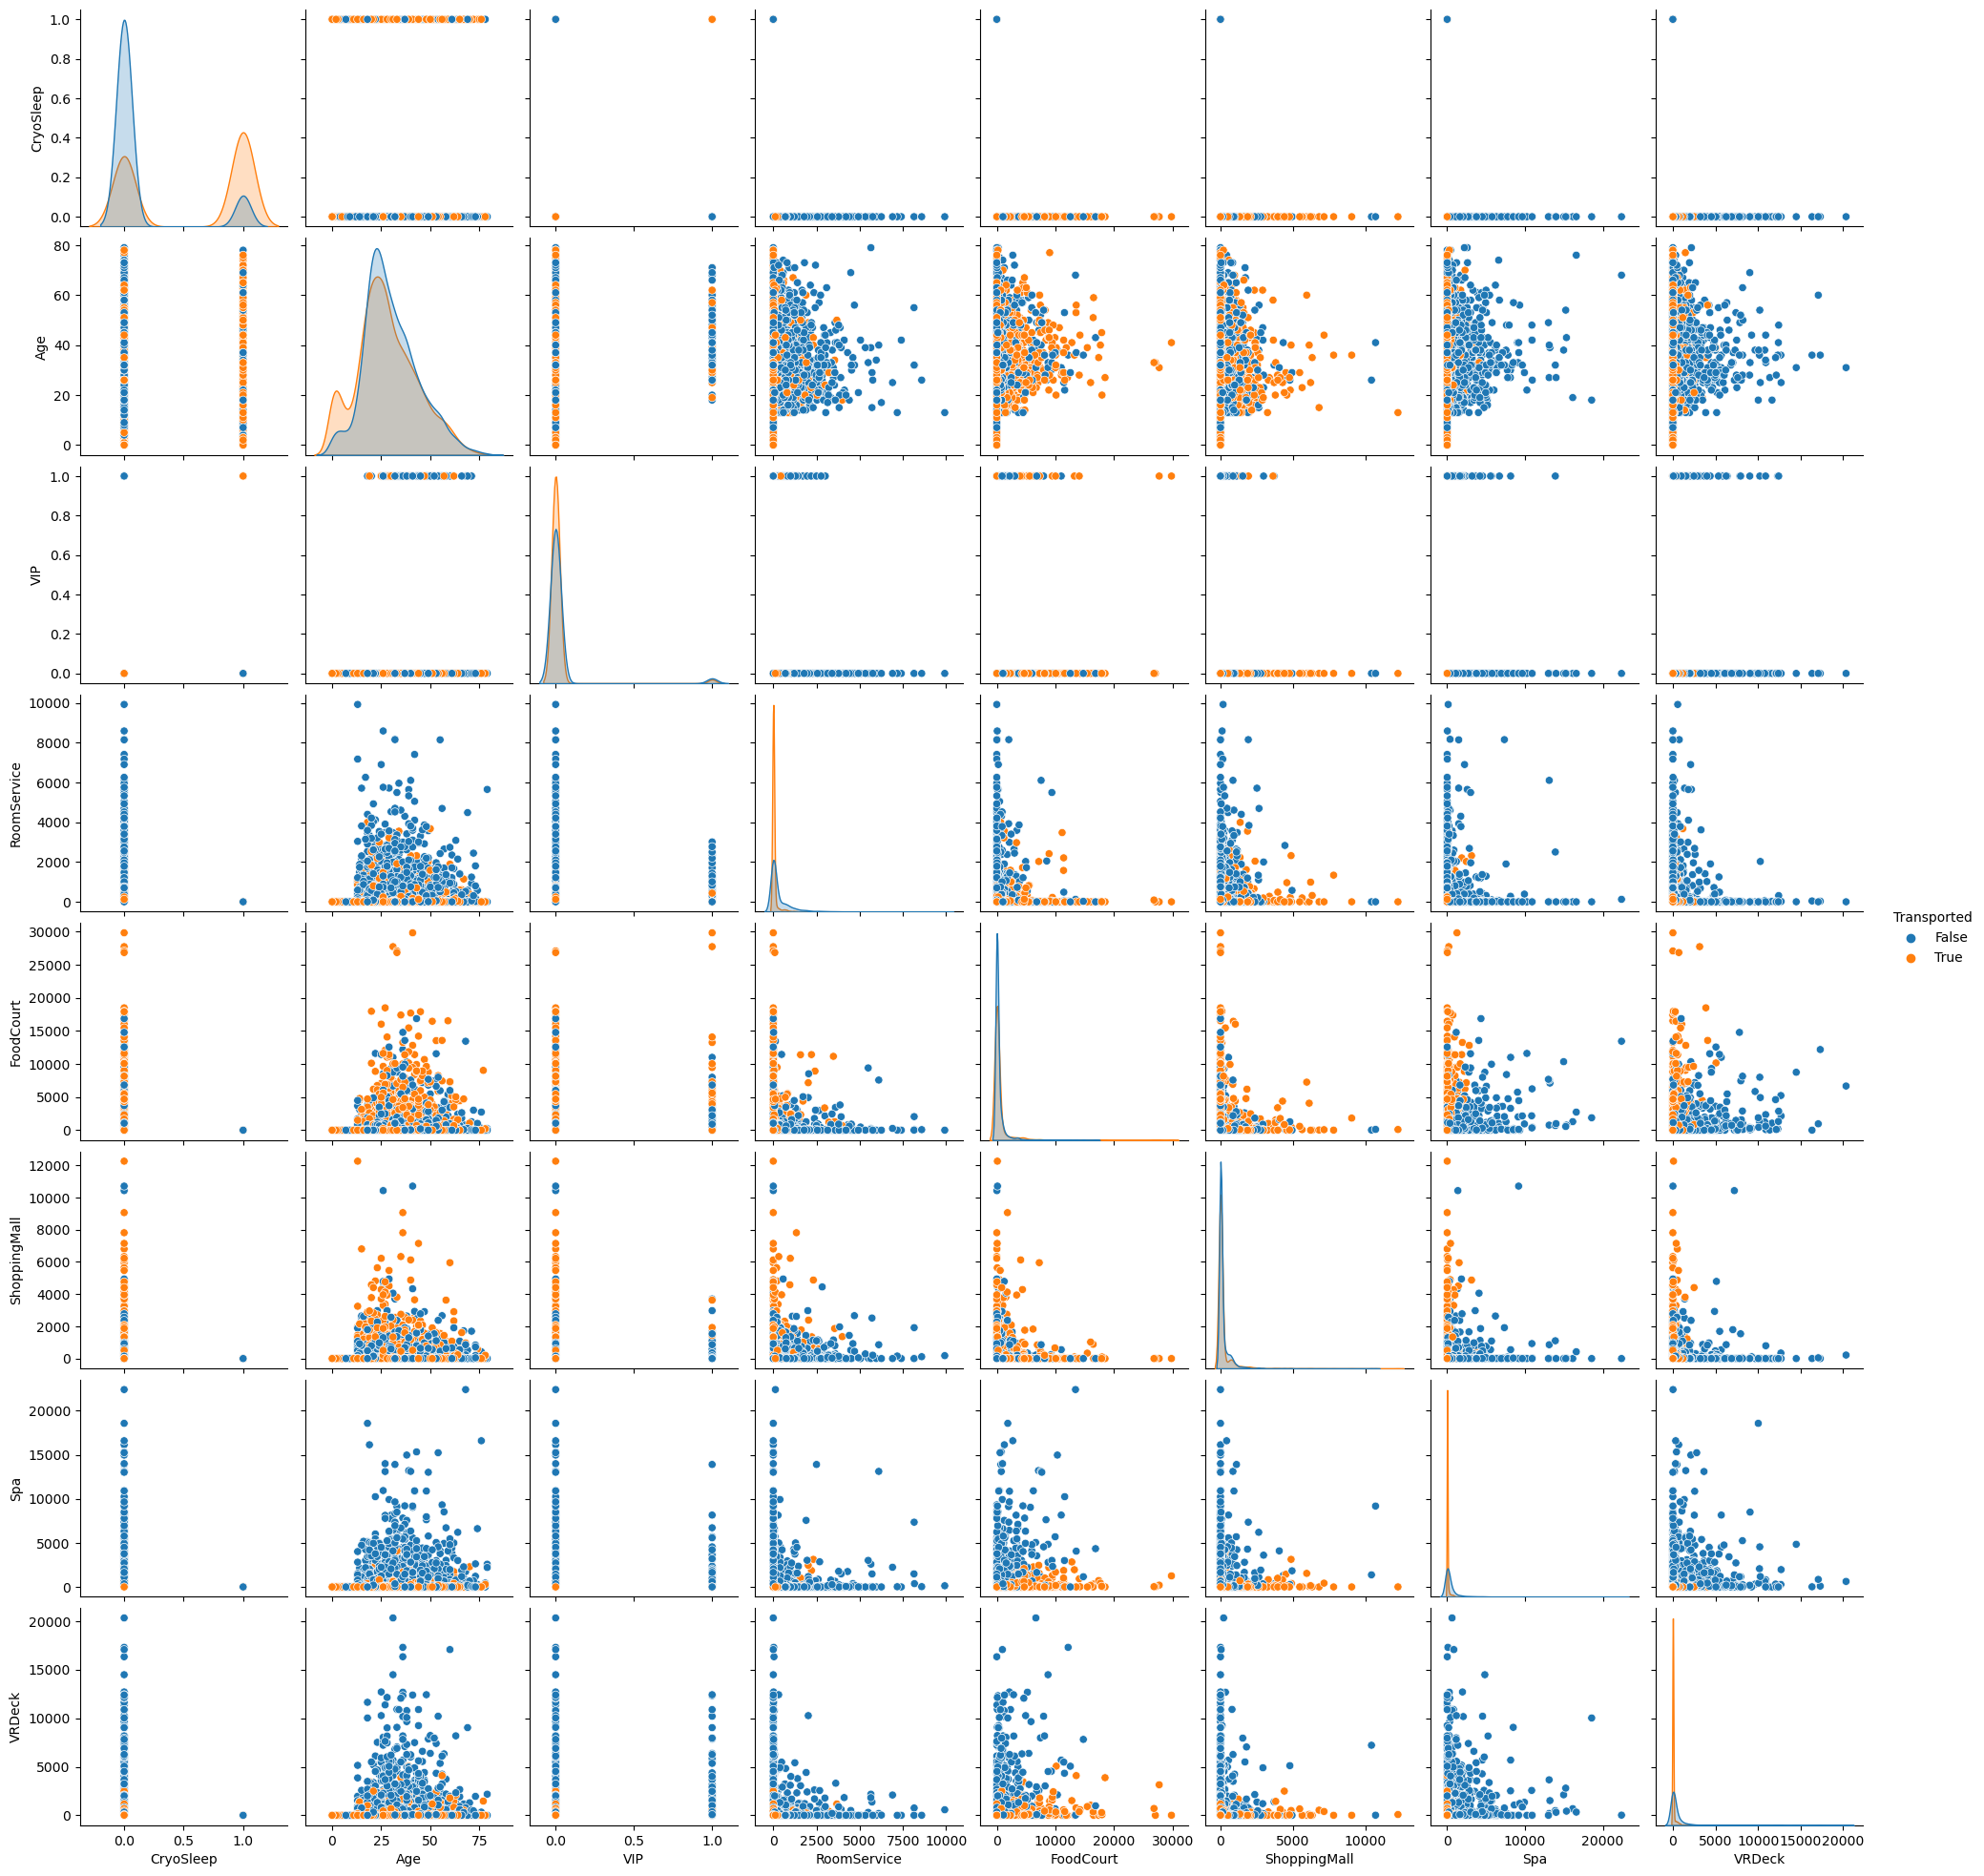

In [10]:
import seaborn as sns 
import matplotlib as plt
sns.pairplot(spaceship, hue="Transported")
plt.show()

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(spaceship_features, spaceship_target, test_size=0.20, random_state=0)

In [13]:
X_train.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3432,32.0,False,0.0,0.0,0.0,0.0,0.0
7312,4.0,False,0.0,0.0,0.0,0.0,0.0
2042,30.0,False,0.0,236.0,0.0,1149.0,0.0
4999,17.0,False,13.0,0.0,565.0,367.0,1.0
5755,26.0,False,0.0,0.0,0.0,0.0,0.0


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)

Fit the model to your data.

In [16]:
knn.fit(X_train, y_train)

c:\Users\darce\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

Evaluate your model.

In [17]:
pred = knn.predict(X_test)
pred

array([ True,  True,  True, ...,  True,  True, False])

In [18]:
y_test.values

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [19]:
knn.score(X_test, y_test)

0.7360060514372163

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.74      0.72      0.73       661
        True       0.73      0.75      0.74       661

    accuracy                           0.74      1322
   macro avg       0.74      0.74      0.74      1322
weighted avg       0.74      0.74      0.74      1322



- Precision: For the class labeled as "True", the model achieves a precision of 0.73, indicating that 73% of the instances predicted as positive are actually true positives.
- Recall: For the class labeled as "True", the model achieves a recall of 0.75, indicating that it correctly identifies 75% of the actual positive instances.
- F1: The F1-score for the class labeled as "True" is 0.74.

Overall, the classification report suggests that the model performs reasonably well, with balanced precision and recall, and a satisfactory F1-score.








**Congratulations, you have just developed your first Machine Learning model!**